## Heavy atom

Writing data
Preparing input	169.72 s
Fitting	0.07 s
pair_coeff	1 1 0   0   0   0   0   0   0   -4243754.624060699  0   0   0   0   0   1506447918708.6582  0   



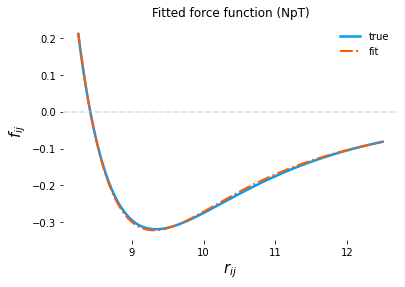

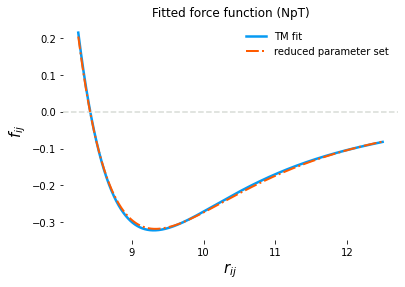

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 1.0 / x * (2 * (7.5/x) ** 12 - (7.5/x) ** 6)
def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p
params = range(-1, -15, -2)

outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/one_component_files/heavy_npt.out"
heavy_atom_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=16, reform_data=True)

heavy_atom_tm.t =  5
heavy_atom_tm.n = 1000
heavy_atom_tm.prepare_training_data()
heavy_atom_tm.fit()

x = np.linspace(8.25, 12.5, 10000)
y_fit = heavy_atom_tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
heavy_atom_tm.best_subset((-7, -13), x, print_coeffs=True)

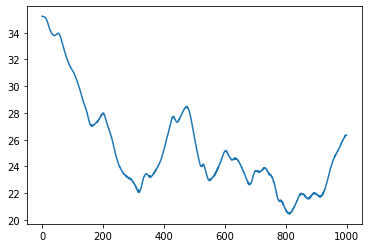

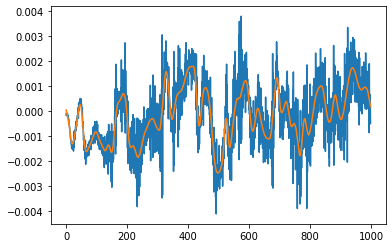

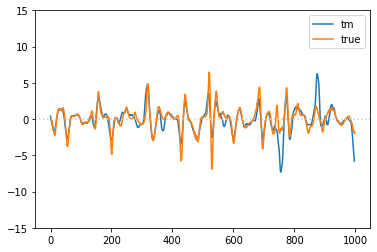

In [2]:
import misc
import matplotlib.pyplot as plt
i = 0 # try self.t = 4 and i = 2 for good gamma explanation

plt.plot(heavy_atom_tm.r[:, i, 0][0:1000])
r = misc.lowess(heavy_atom_tm.r[:, i, 0], f=0.075)
plt.show()

v_ = misc.lowess(heavy_atom_tm.v[:, i, 0][0:1000], f=0.02, iter=5)
plt.plot(heavy_atom_tm.v[:, i, 0][0:1000])
plt.plot(v_[0:1000])
plt.show()

a_fit = misc.lowess(heavy_atom_tm.a[:, i, 0][0:1000], f=0.02, iter=5) * 340.42  * heavy_atom_tm.timestep ** 2

plt.plot(a_fit , label='tm')
plt.plot(heavy_atom_tm.f[:, i, 0][0:1000], label='true')
plt.axhline(0, color='xkcd:silver', ls=':')
plt.legend()
plt.ylim([-15,15])
plt.show()


## Small atom

Writing data
Preparing input	72.62 s
Fitting	0.09 s
pair_coeff	1 1 0   0   0   0   0   0   0   -282809.4525411527  0   0   0   0   0   8848027250.204115  0   



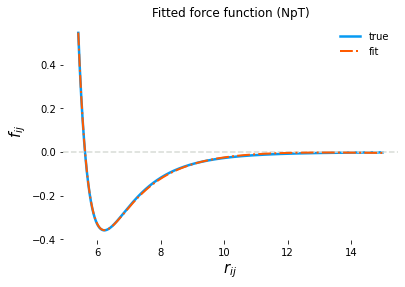

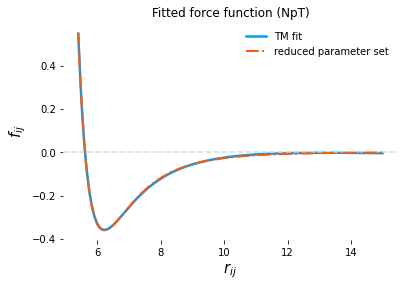

In [3]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * (5/x) ** 12 - (5/x) ** 6)
def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p
params = range(-1, -15, -2)

outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/one_component_files/small_npt.out"
small_atom_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=16)

small_atom_tm.t = 2
small_atom_tm.n = 5000
small_atom_tm.prepare_training_data()
small_atom_tm.fit()

x = np.linspace(5.4, 15, 10000)
y_fit = small_atom_tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
small_atom_tm.best_subset((-7, -13), x, print_coeffs=True)

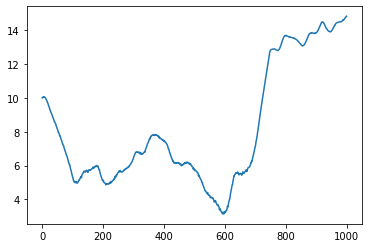

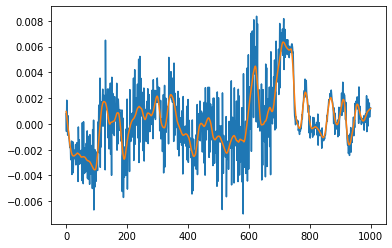

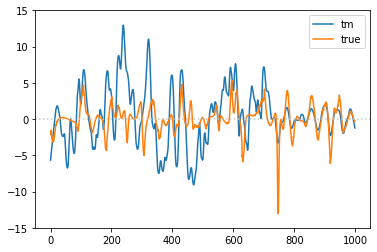

In [4]:
import misc
import matplotlib.pyplot as plt
i = 1

plt.plot(small_atom_tm.r[:, i, 0][0:1000])
r = misc.lowess(small_atom_tm.r[:, i, 0], f=0.075)
plt.show()

v_ = misc.lowess(small_atom_tm.v[:, i, 0][0:1000], f=0.02, iter=5)
plt.plot(small_atom_tm.v[:, i, 0][0:1000])
plt.plot(v_[0:1000])
plt.show()

a_fit = misc.lowess(small_atom_tm.a[:, i, 0][0:1000], f=0.02, iter=5) * 340.42  * small_atom_tm.timestep ** 2

plt.plot(a_fit , label='tm')
plt.plot(small_atom_tm.f[:, i, 0][0:1000], label='true')
plt.axhline(0, color='xkcd:silver', ls=':')
plt.legend()
plt.ylim([-15,15])
plt.show()

## 2:1 small / heavy

Writing data
Preparing input	238.48 s
Fitting	0.05 s


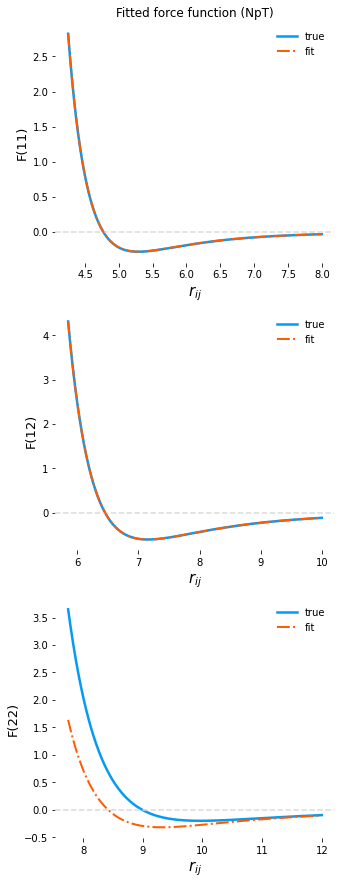

In [5]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_2component


X = [np.linspace(4.25, 8, 1000), np.linspace(5.85, 10, 1000), np.linspace(7.75, 12, 1000)]

def target_function0(x):
    return 24 * 0.50 / x * (2 * (4.25/x) ** 12 - (4.25/x) ** 6)

def target_function1(x):
    return 24 * 1.45 / x * (2 * (5.75/x) ** 12 - (5.75/x) ** 6)

def target_function2(x):
    return 24 * 1.00 / x * (2 * (7.75/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p



params = range(-1, -15, -2)

outfile = "/home/markjenei/polymerisation-coarse-graining/lj_test/two_component_files/lj_trajectory_match_npt.out"
two_atom_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=16)

two_atom_tm.t = 2
two_atom_tm.n = 5000
two_atom_tm.prepare_training_data()
two_atom_tm.fit()

Y = [target_function0(X[0]), target_function1(X[1]), target_function2(X[2])]
Y_fit = [two_atom_tm.predict(X[0])[0], two_atom_tm.predict(X[1])[1], two_atom_tm.predict(X[2])[2]]
plot_2component(X, Y_fit, Y)